In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
diabetes_data = pd.read_csv('/kaggle/input/diabetesprediction/diabetes_prediction_dataset.csv')
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [17]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['age','hypertension','heart_disease','smoking_history','bmi']] = diabetes_data_copy[['age','hypertension','heart_disease','smoking_history','bmi']].replace(0,np.NaN)
print(diabetes_data_copy.isnull().sum())


gender                     0
age                        0
hypertension           92515
heart_disease          96058
smoking_history            0
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64


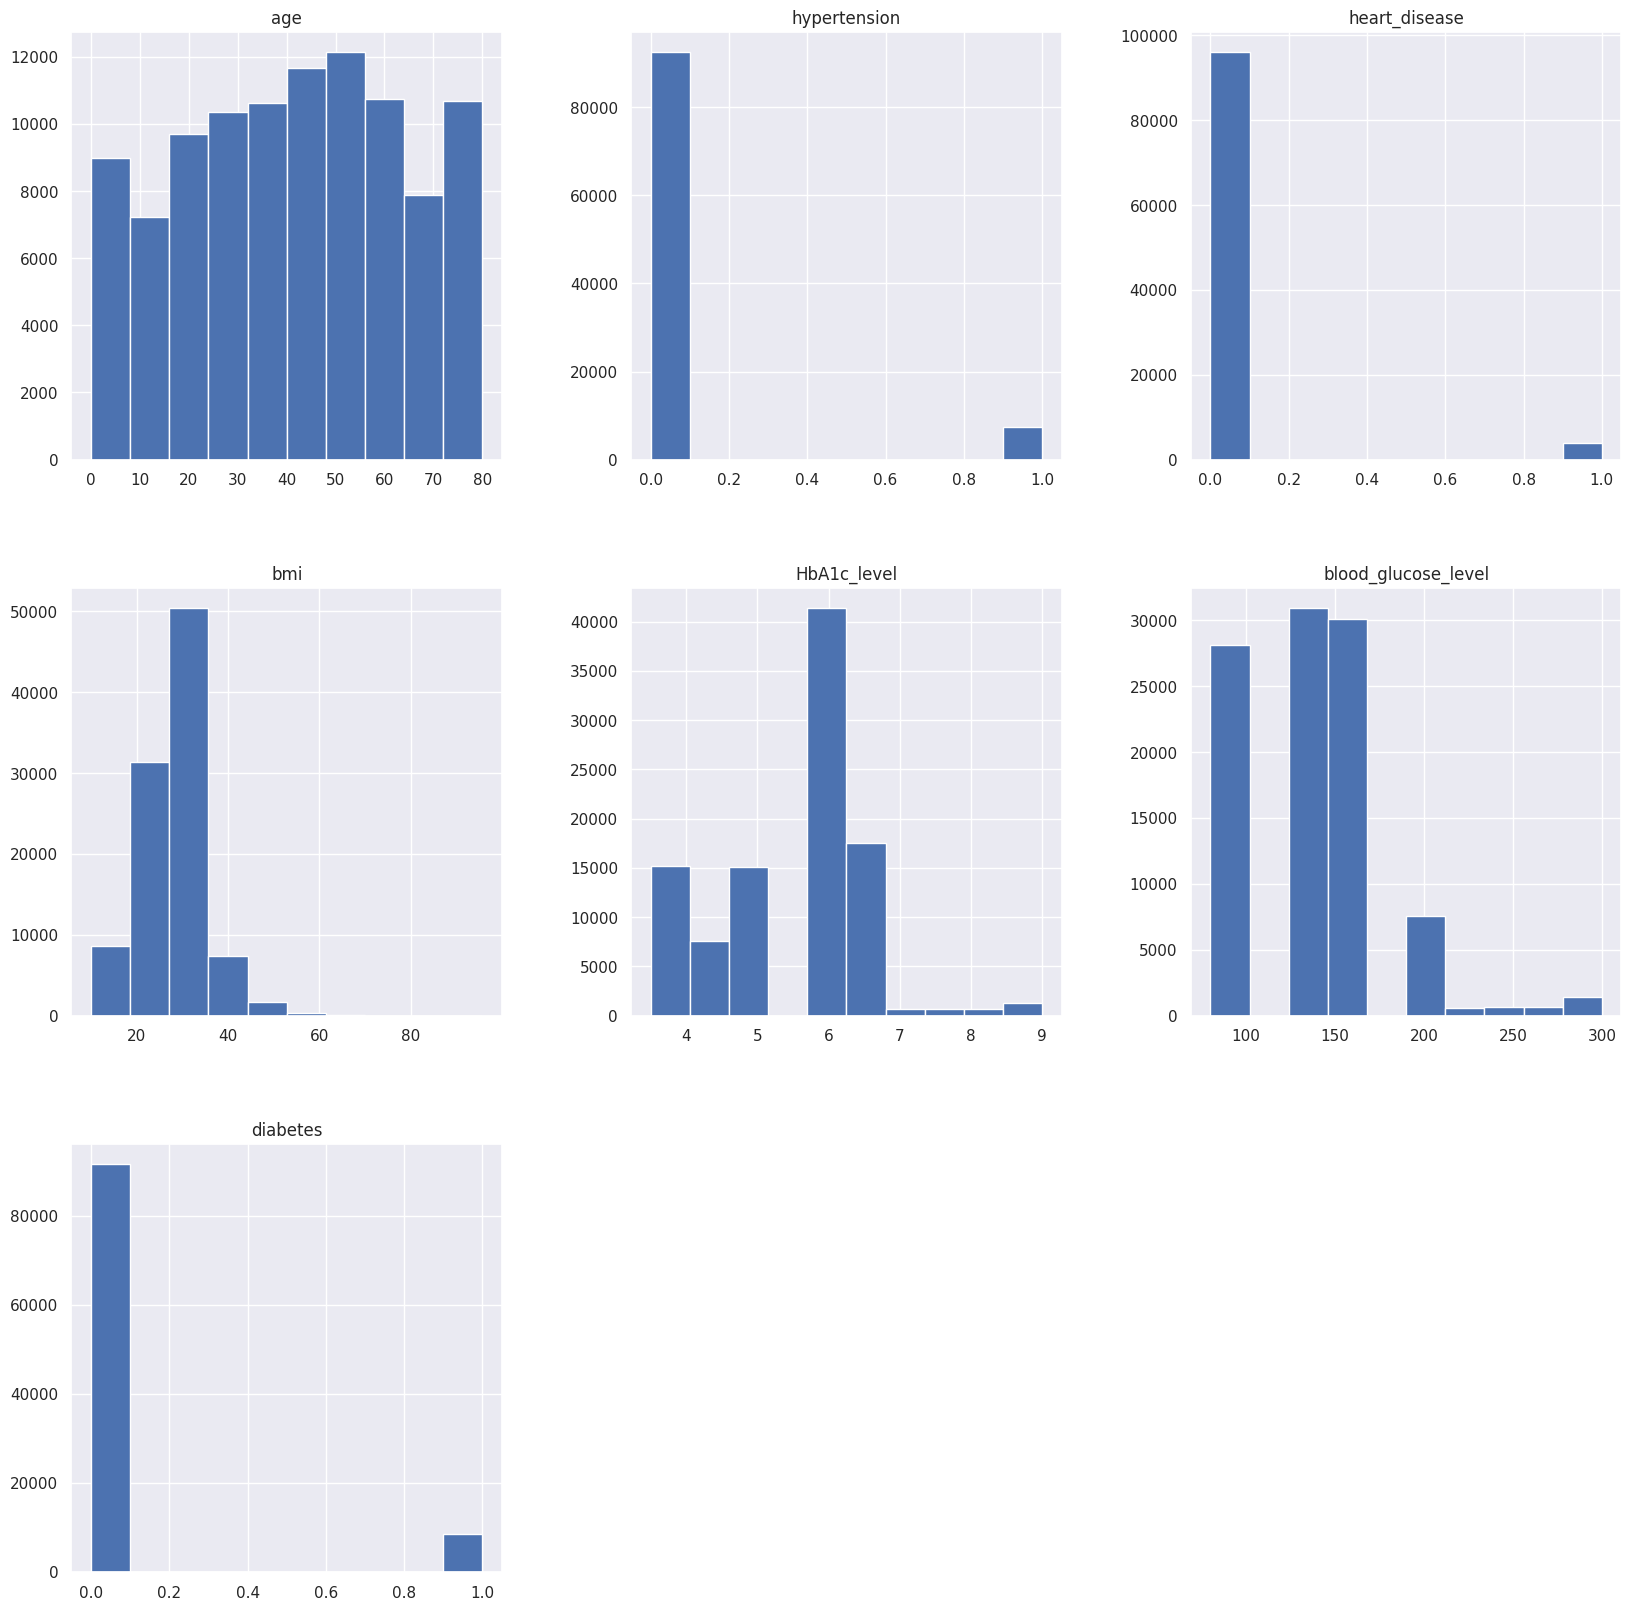

In [18]:
p = diabetes_data.hist(figsize = (20,20))

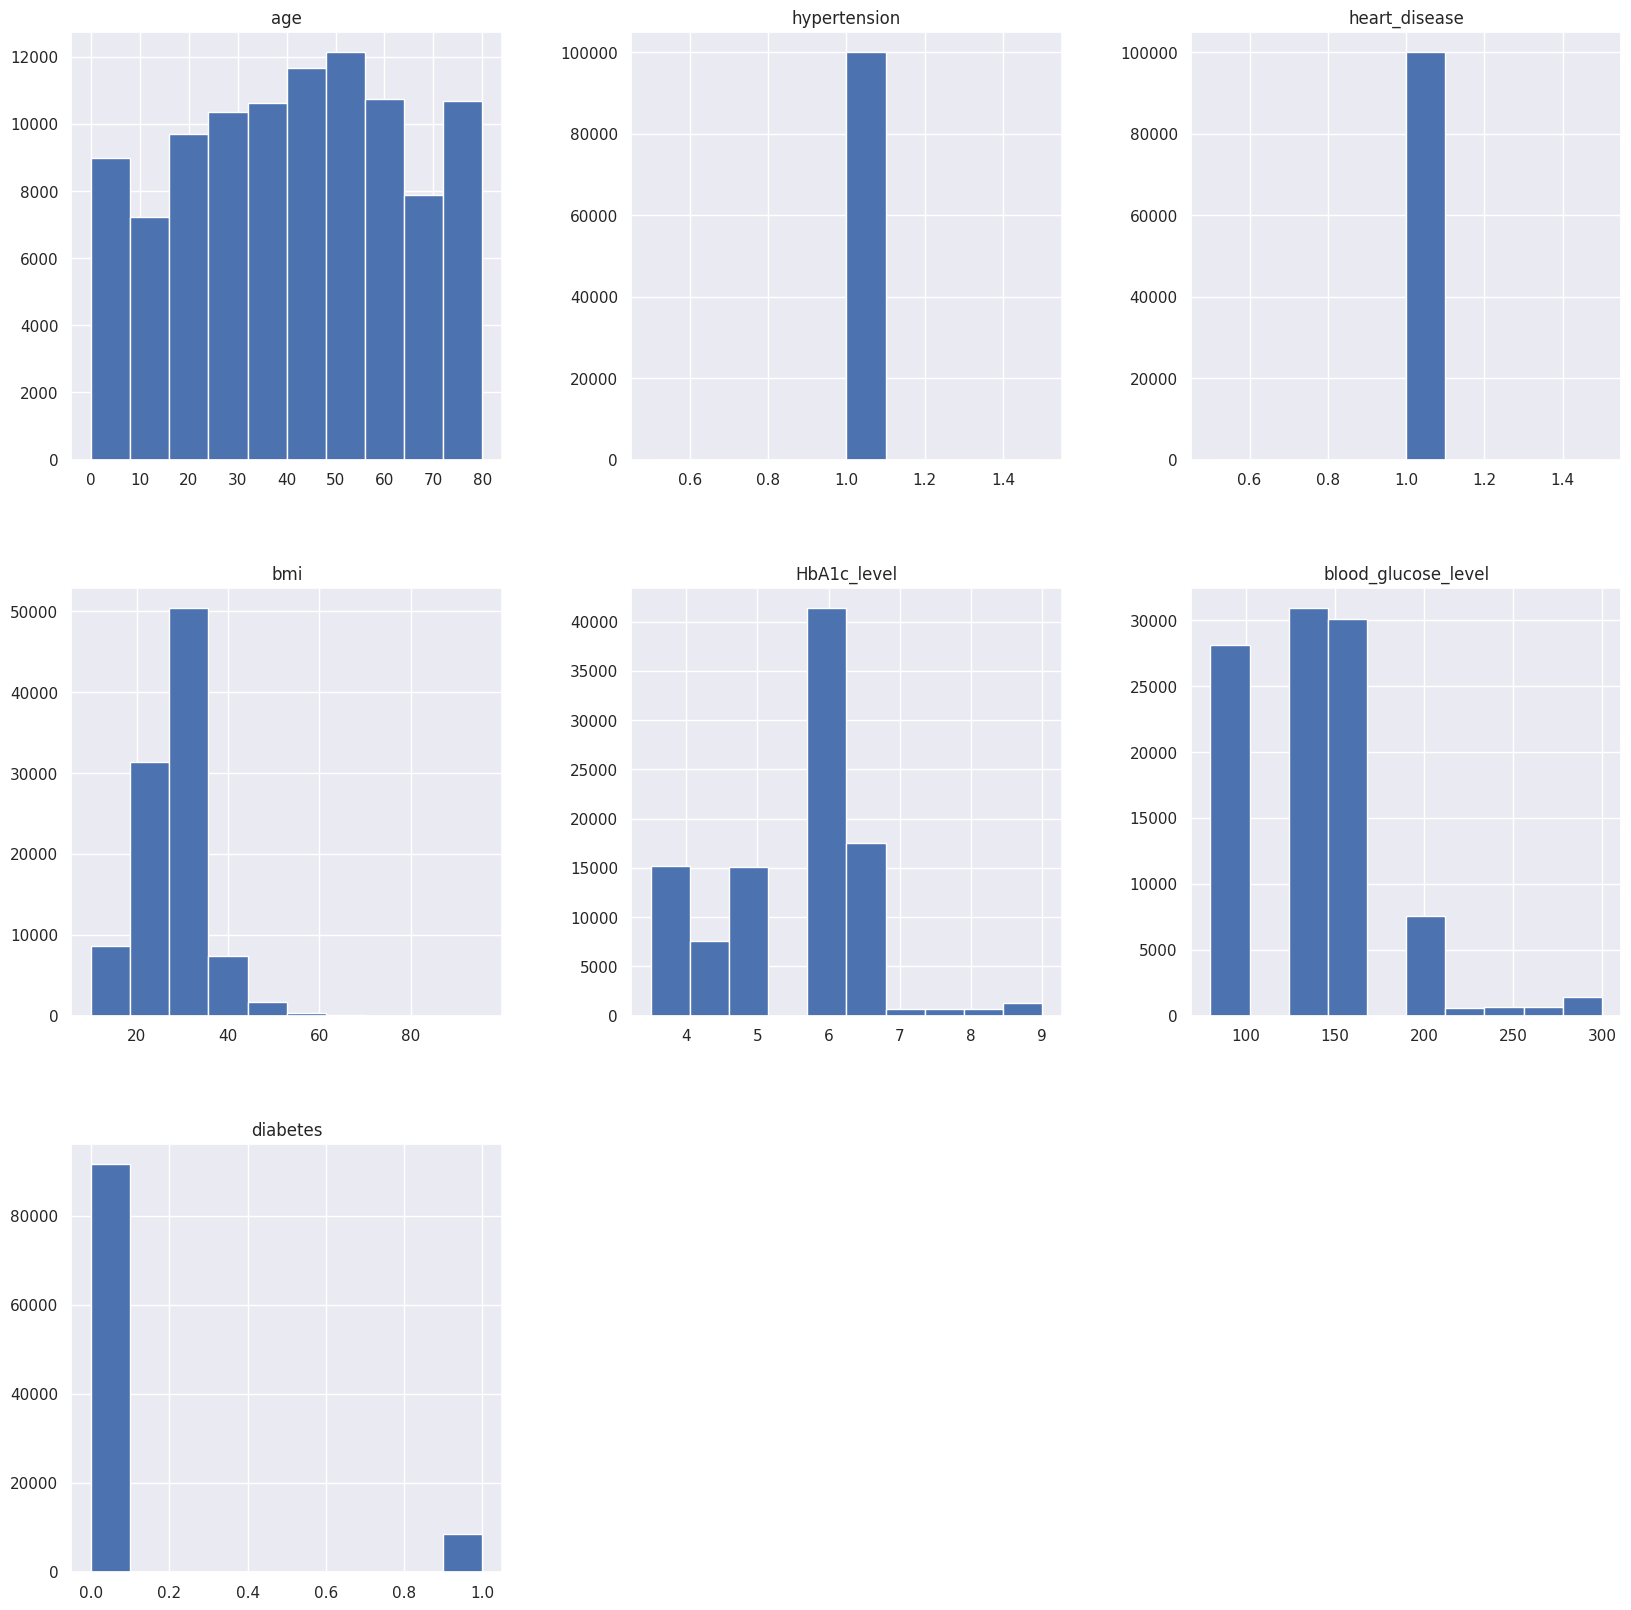

In [24]:

diabetes_data_copy['hypertension'].fillna(diabetes_data_copy['hypertension'].mean(), inplace=True)
diabetes_data_copy['heart_disease'].fillna(diabetes_data_copy['heart_disease'].median(), inplace=True)
diabetes_data_copy['smoking_history'].fillna(diabetes_data_copy['smoking_history'].mode()[0], inplace=True)
diabetes_data_copy['bmi'].fillna(diabetes_data_copy['bmi'].median(), inplace=True)
p = diabetes_data_copy.hist(figsize = (20,20))

In [25]:
diabetes_data.shape

(100000, 9)

In [ ]:
import missingno as msno
p=msno.bar(diabetes_data)

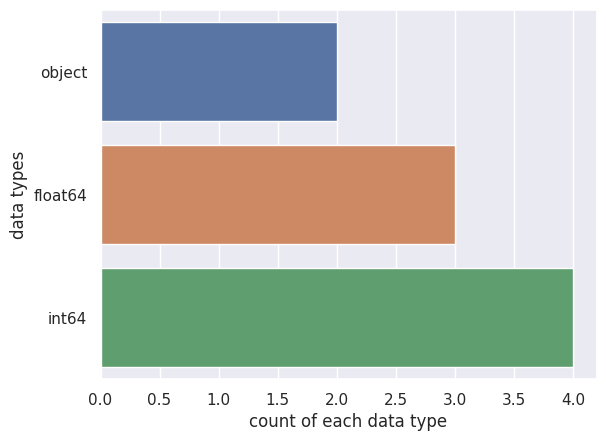

In [26]:
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

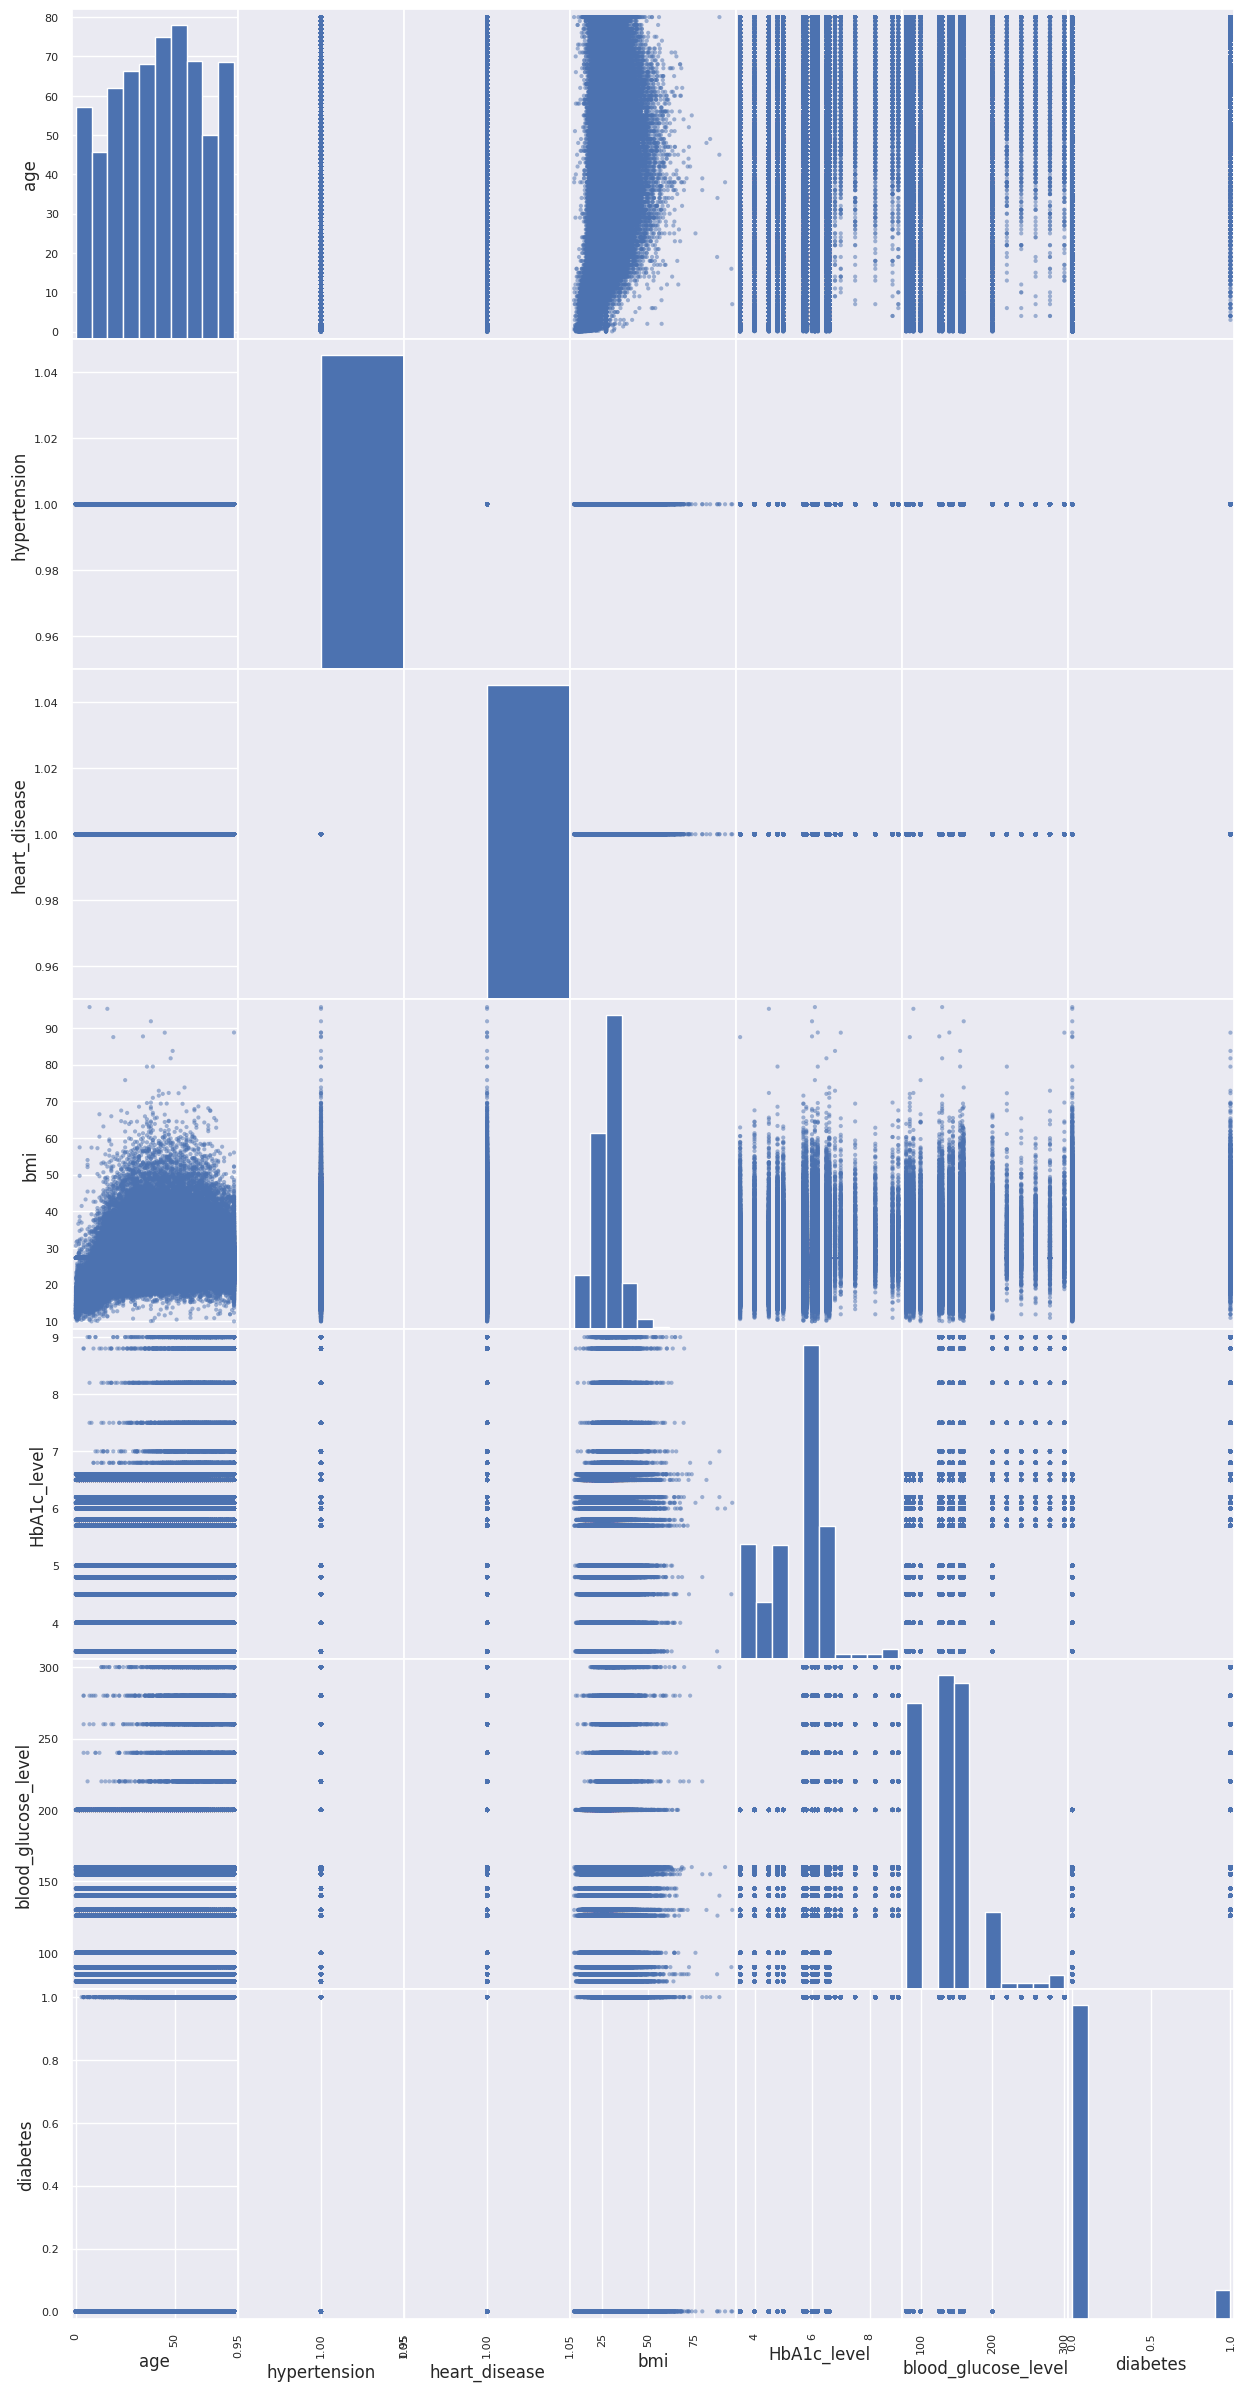

In [38]:
from pandas.plotting import scatter_matrix
import pandas as pd
p = scatter_matrix(diabetes_data_copy, figsize=(40,40))

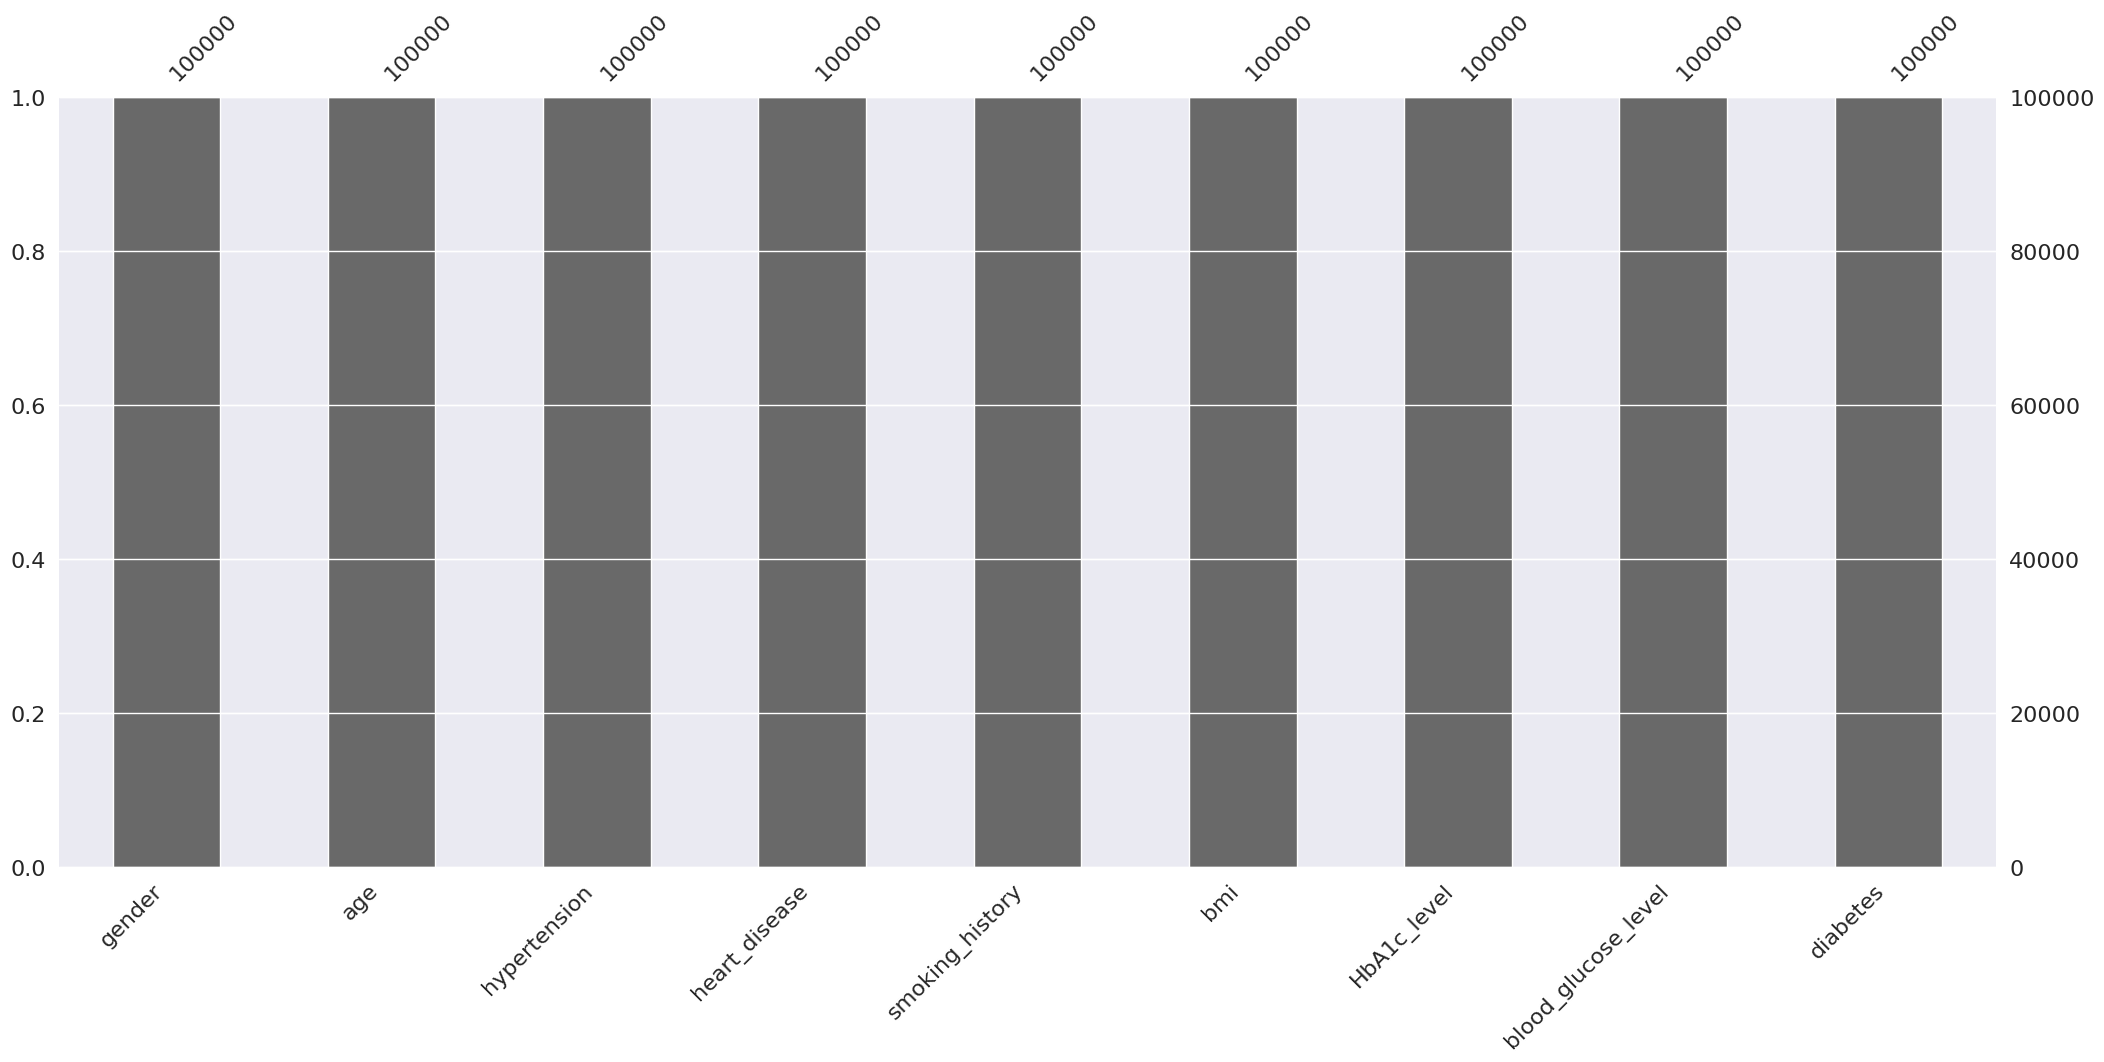

In [27]:
import missingno as msno
p=msno.bar(diabetes_data)

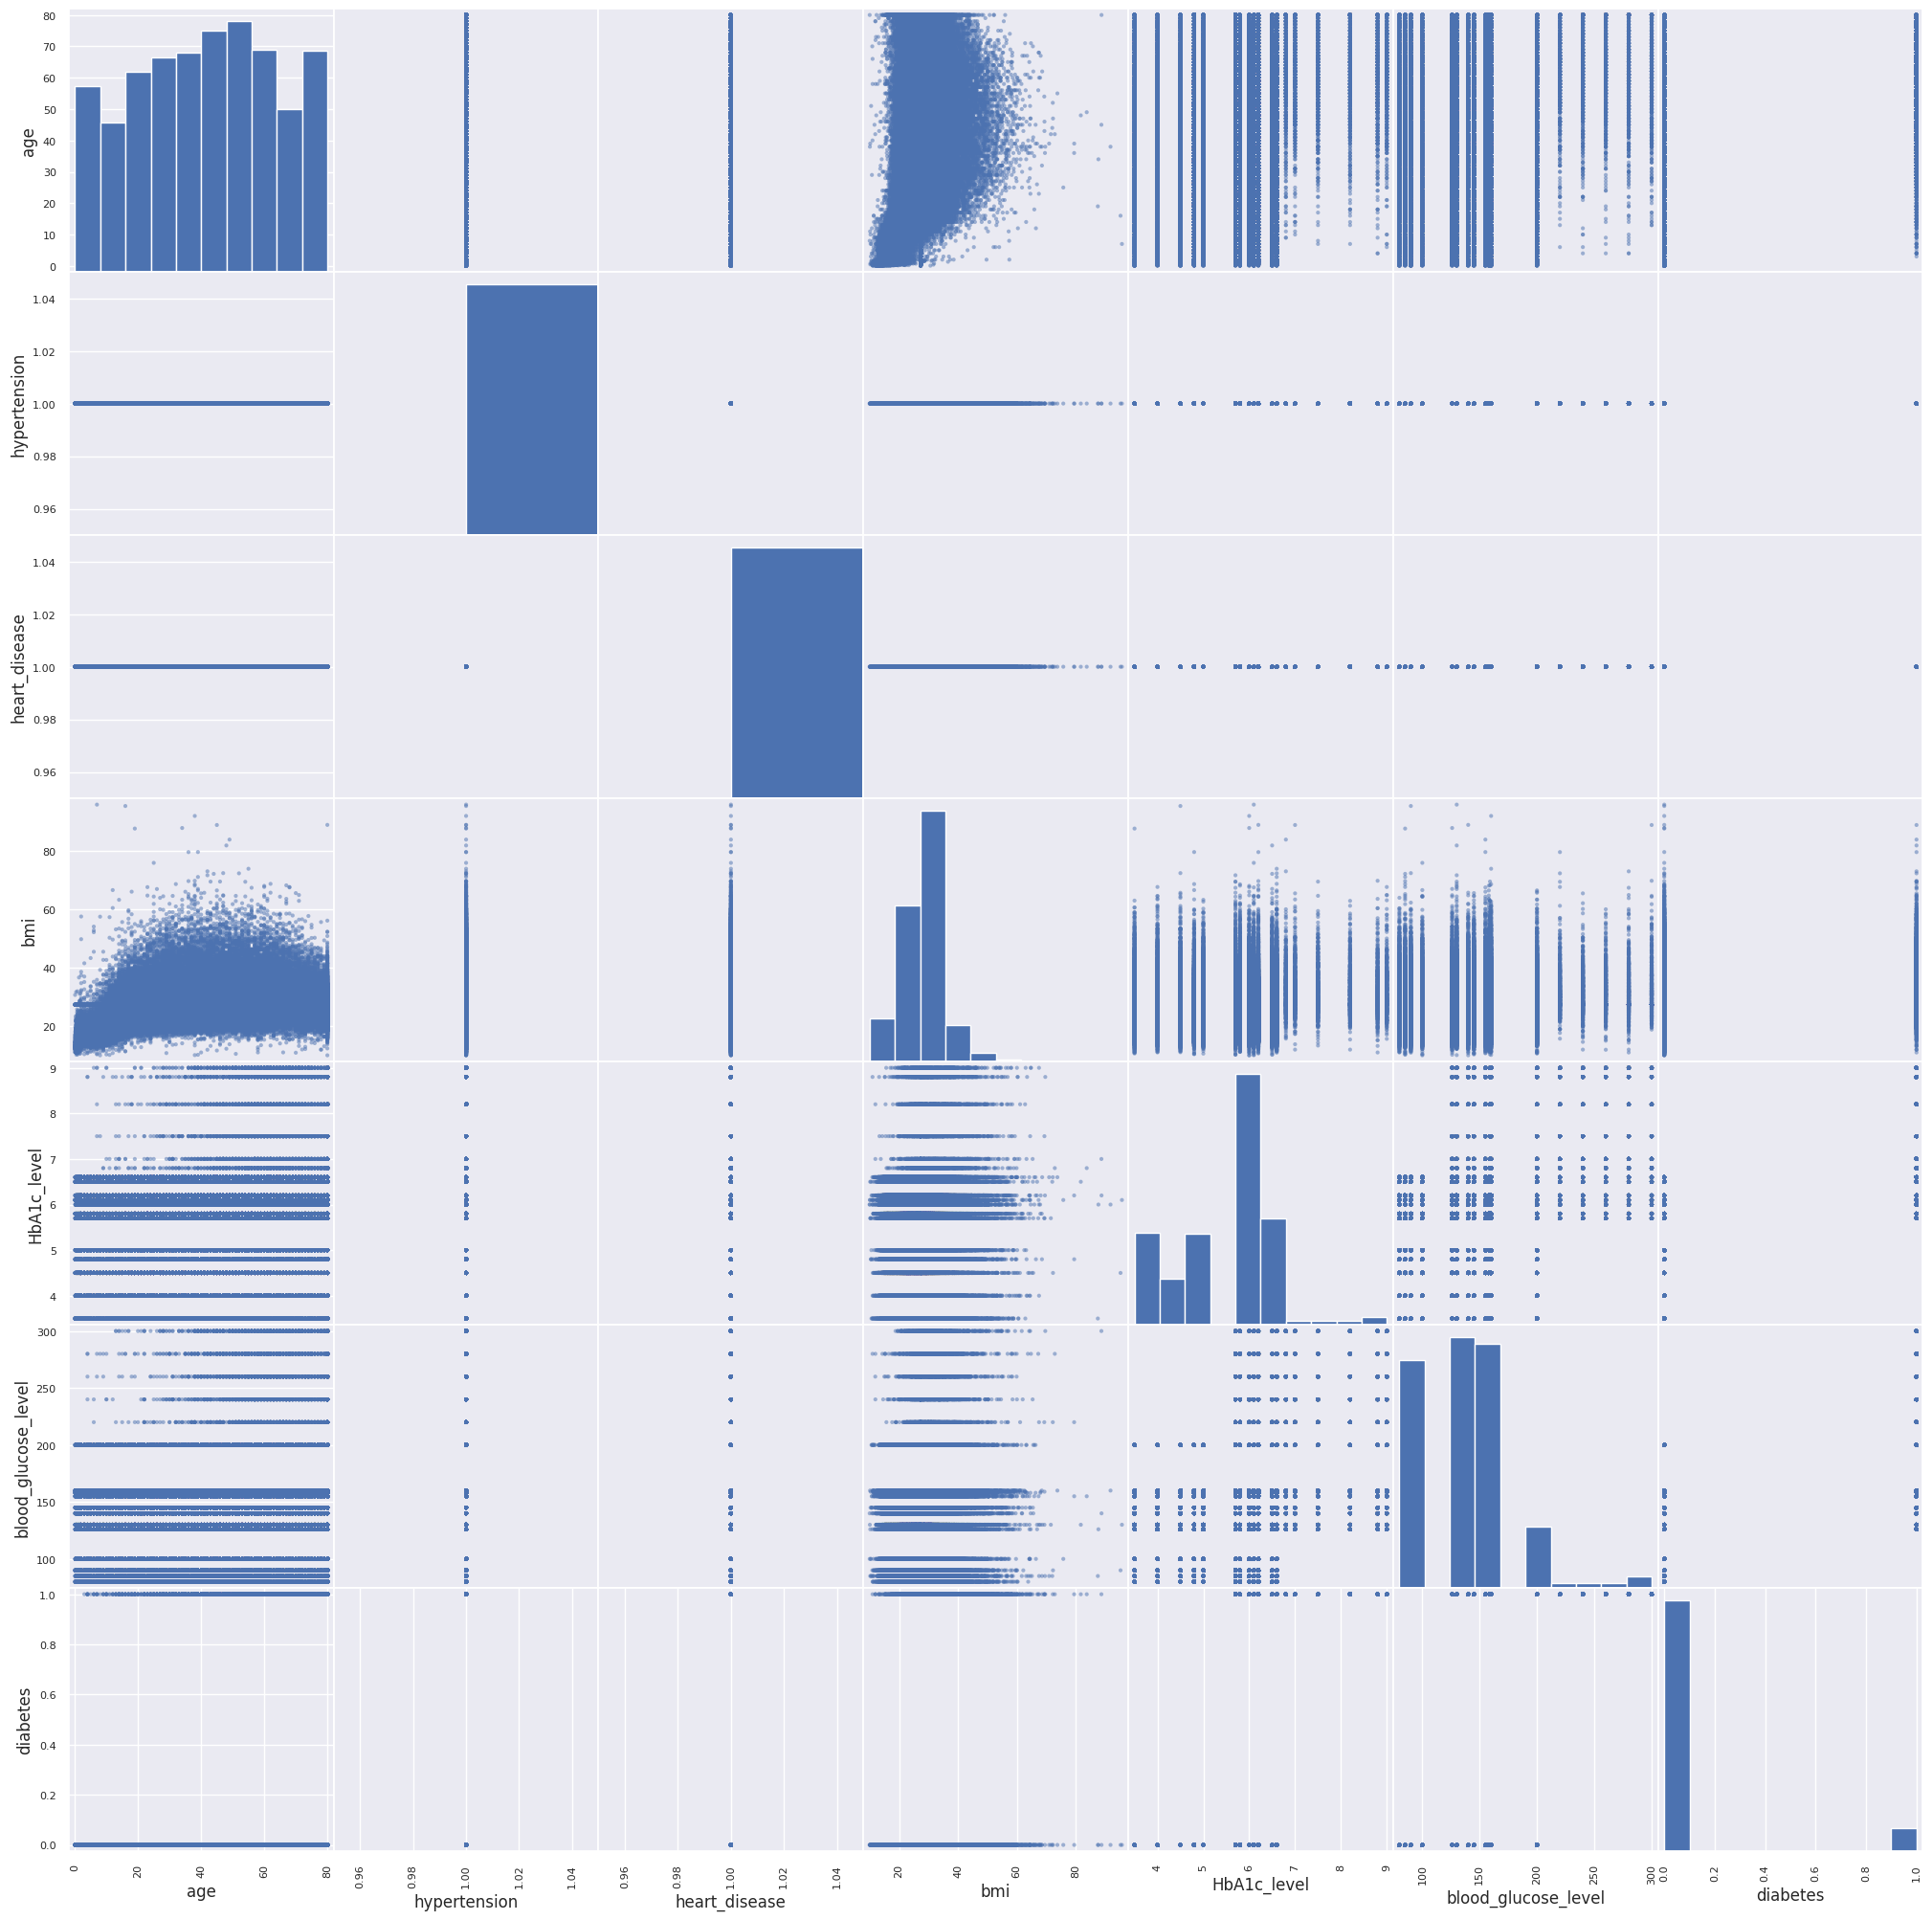

In [44]:
from pandas.plotting import scatter_matrix
import pandas as pd
p = scatter_matrix(diabetes_data_copy, figsize=(25, 25))

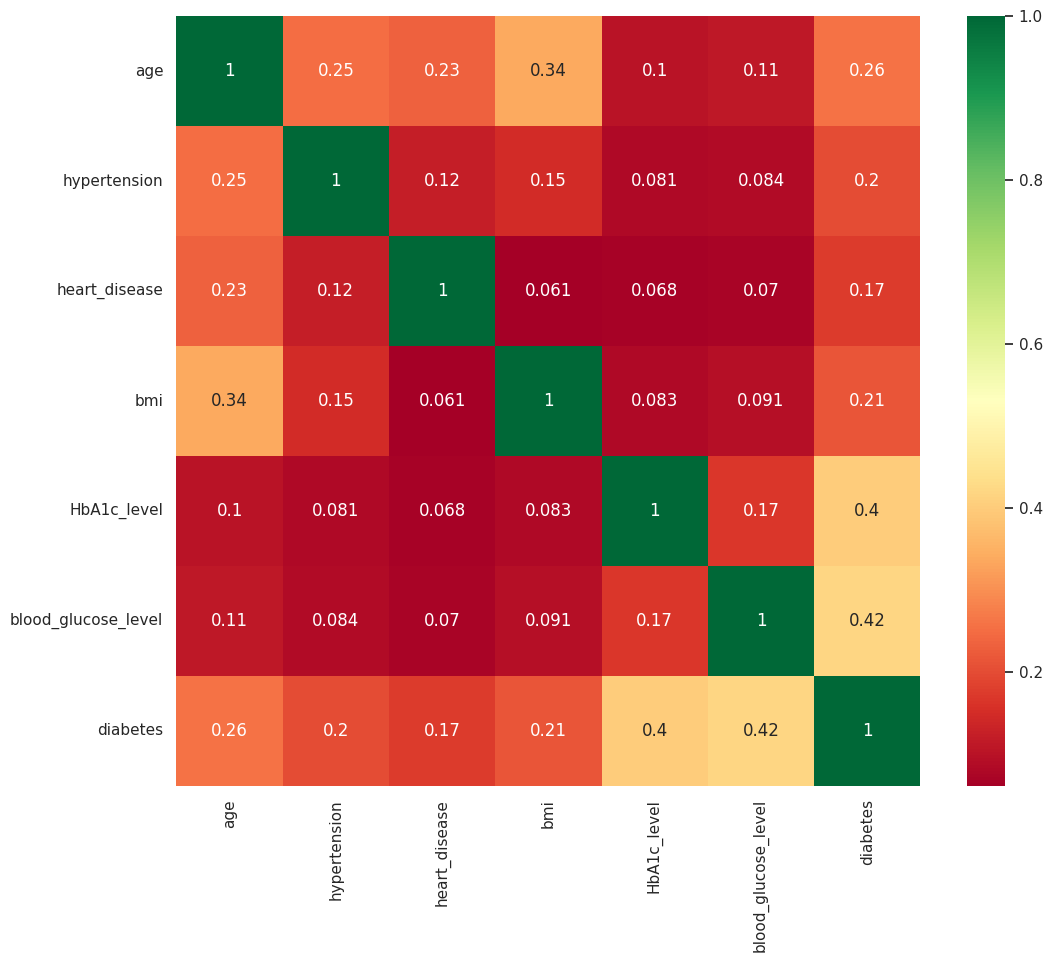

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_data = diabetes_data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
print(diabetes_data_copy.columns)
if 'diabetes' in diabetes_data_copy.columns:
    X = diabetes_data_copy.drop(['diabetes'], axis=1)
    y = diabetes_data_copy['diabetes']
else:
    raise KeyError("'diabetes' column not found in diabetes_data_copy")
categorical_columns = ['gender', 'smoking_history']


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first')  
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_columns)
    ])
X_processed = preprocessor.fit_transform(X)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
feature_names = numeric_features.tolist() + cat_feature_names.tolist()
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=1/3, random_state=42, stratify=y
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
X_train shape: (66666, 13)
X_test shape: (33334, 13)
y_train shape: (66666,)
y_test shape: (33334,)


In [64]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,1.0,1.0,never,25.19,6.6,140
1,Female,54.0,1.0,1.0,No Info,27.32,6.6,80
2,Male,28.0,1.0,1.0,never,27.32,5.7,158
3,Female,36.0,1.0,1.0,current,23.45,5.0,155
4,Male,76.0,1.0,1.0,current,20.14,4.8,155


In [68]:
y = diabetes_data_copy.diabetes

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [74]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.88149881498815 % and k = [1]


In [75]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 96.37307253854924 % and k = [2]


In [88]:
print("Length of train_scores:", len(train_scores))
print("Length of test_scores:", len(test_scores))
print("First few train_scores:", train_scores[:5])
print("First few test_scores:", test_scores[:5])

Length of train_scores: 8
Length of test_scores: 8
First few train_scores: [1.0, 0.875, 0.75, 0.5, 0.375]
First few test_scores: [0.5, 0.5, 0.0, 0.0, 0.0]


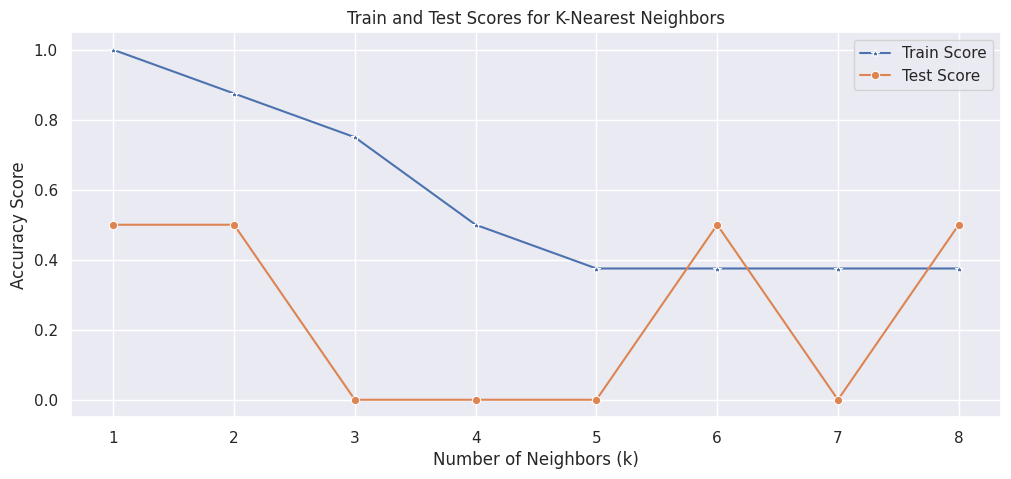

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
num_neighbors = len(train_scores)
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, num_neighbors + 1), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, num_neighbors + 1), y=test_scores, marker='o', label='Test Score')
plt.title('Train and Test Scores for K-Nearest Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [91]:
knn = KNeighborsClassifier(n_neighbors=8)  # Use a value ≤ number of training samples
knn.fit(X_train, y_train)
print("Test score:", knn.score(X_test, y_test))

Test score: 0.5


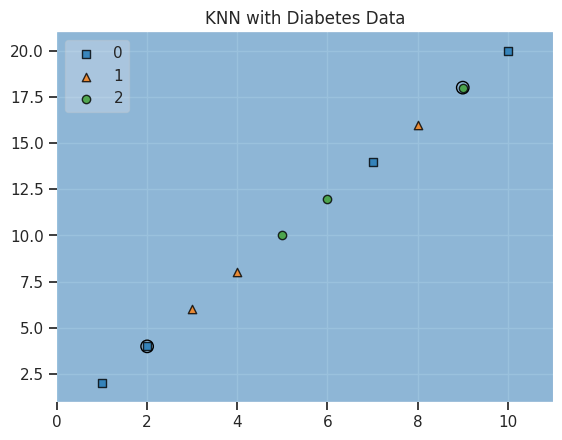

In [92]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [93]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,1,1
2,1,1
All,2,2


Text(0.5, 19.049999999999997, 'Predicted label')

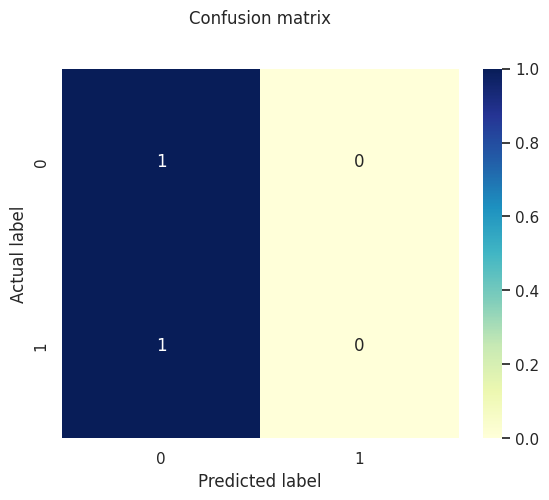

In [94]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [97]:
y_test_binary = (y_test == 2).astype(int)
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [98]:
y_test_binary = (y_test == 2).astype(int)
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

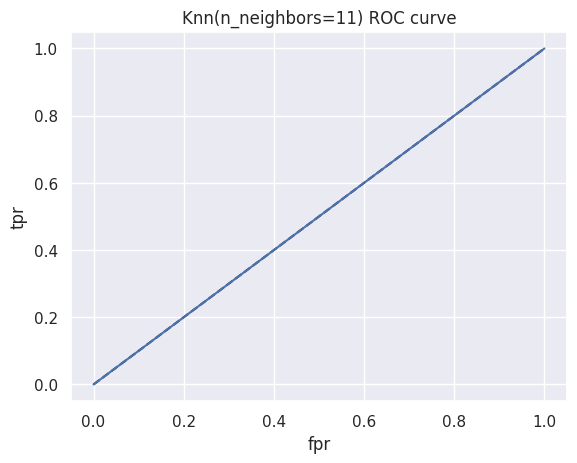

In [99]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [100]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5

In [102]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=3) 
knn_cv = GridSearchCV(knn, param_grid, cv=cv)
knn_cv.fit(X, y)
print("Best Score: " + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 0.4166666666666667
Best Parameters: {'n_neighbors': 1}
